We will start by importing libaries we will need

In [41]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn import linear_model
import numpy as np
import statsmodels.formula.api as smf


There are two data frames we are interested in both from a website https://www.tomato.gg/
This website is a gaint online source of world of tank data. Offering both player and vehicle data. 
We will scape data from these webpages and turn them into dataframes.

IMPORTANT!!!
There are two main data tables we are interested in the first is generl information the next deals with the tank economy.
The website is updated on a almost weekly basis. This may cause the get request to fail when it is down for maintaince it could also mean the names or labels of revant columns and data are changed. This can be an issue as variable names could be altered making the code not preform as expected.
In order to address this I decided to scape the page once and write the output to a text file. I used the data from this text file in my project.
The text file is up to date as off April 2023 which will suffice for my primary purpose.
Below I have provided the code I used to scape the webpage. 
This may not always work for the reasons stated above this is fine as project is will work with the text file. 
The code below demonstates the inital scaping process.

In [42]:
url = "https://www.tomato.gg/tank-stats/NA"


response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")


script = soup.find("script", {"id": "__NEXT_DATA__"})

if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]
    
    
    fieldnames = set()
    for obj in initial_data:
        fieldnames.update(obj.keys())

    # Specify the filename for the CSV
    filename = "output.csv"

    # Write JSON objects to CSV with UTF-8 encoding
    with open(filename, mode="w", newline="", encoding="utf-8") as file:  # Specify UTF-8 encoding
        writer = csv.DictWriter(file, fieldnames=list(fieldnames))
        writer.writeheader()
        writer.writerows(initial_data)   
else:
    print("Error data not found")



In [43]:
url = "https://www.tomato.gg/economics/all"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

script = soup.find("script", {"id": "__NEXT_DATA__"})
if script:
    contents = script.contents[0]
    data = json.loads(contents)
    initial_data = data["props"]["pageProps"]["data"]['data']

    fieldnames = set()
    for obj in initial_data:
        fieldnames.update(obj.keys())
        
    filename = "output.csv"

    with open(filename, mode="w", newline="", encoding="utf-8") as file:  # Specify UTF-8 encoding
        writer = csv.DictWriter(file, fieldnames=list(fieldnames))
        writer.writeheader()
        writer.writerows(initial_data)  
    
else:
    print("Error data not found")

We will now contruct the dataframes with the data from the two older text files

In [44]:
generalDf = pd.read_csv('rawDataOutput/generalData.csv', encoding='utf')
generalDf

damage_received  survival  damage_received_from_invisible  life_time  \
0               1085     27.44                             353        297   
1                928     30.85                             401        341   
2                782     23.45                             250        269   
3                842     34.90                             345        358   
4               1507     28.56                             457        316   
..               ...       ...                             ...        ...   
557             1362     14.46                             487        309   
558             1251     29.85                             281        320   
559             1791     15.56                             508        299   
560              541     33.33                              65        226   
561              980      0.00                             410        208   

      nation  player_winrate  winrate  \
0     France           51.46    53.36   
1    Germany           49.05    48.96   
2     France           50.28    50.58   
3       USSR           49.74    49.72   
4     France           49.38    50.34   
..       ...             ...      ...   
557      USA           48.80    49.86   
558    Czech           58.50    59.85   
559    China            0.00     0.00   
560  Germany           62.79    65.38   
561     USSR            0.00     0.00   

                                                 image  isPrem class  ...  \
0    https://api.worldoftanks.com/static/2.66.0/wot...    True    MT  ...   
1    https://api.worldoftanks.com/static/2.66.0/wot...    True    TD  ...   
2    https://api.worldoftanks.com/static/2.66.0/wot...    True    LT  ...   
3    https://api.worldoftanks.com/static/2.66.0/wot...    True    TD  ...   
4    https://api.worldoftanks.com/static/2.66.0/wot...    True    MT  ...   
..                                                 ...     ...   ...  ...   
557  https://api.worldoftanks.com/static/2.66.0/wot...    True    MT  ...   
558  https://api.worldoftanks.com/static/2.66.0/wot...    True    HT  ...   
559  https://api.worldoftanks.com/static/2.71.0/wot...    True    HT  ...   
560  https://api.worldoftanks.com/static/2.66.0/wot...    True    MT  ...   
561  https://api.worldoftanks.com/static/2.66.0/wot...    True    HT  ...   

     frags  penetrations  base_capture_points  distance_traveled  hit_rate  \
0     0.98          4.30                 0.48               1812     74.13   
1     0.81          2.90                 0.71               1248     63.42   
2     0.55          2.91                 0.97               1741     72.56   
3     0.91          3.04                 0.84               1195     64.04   
4     0.91          4.33                 0.62               1679     75.65   
..     ...           ...                  ...                ...       ...   
557   0.48          3.40                 1.37               1428     66.24   
558   0.81          6.07                 0.10               1200     71.72   
559   0.78          3.89                 0.00               1280     72.46   
560   1.17          8.17                 0.00               1151     81.82   
561   0.00          5.00                 0.00                765    100.00   

             name  tracking_assist  potential_damage_received  pen_rate  \
0      Bourrasque               52                       1052     76.34   
1      Skorpion G               43                        886     73.59   
2     ELC EVEN 90               23                        761     78.22   
3        SU-130PM               44                        784     73.70   
4    Char Futur 4               62                       1599     74.59   
..            ...              ...                        ...       ...   
557         T95E2               40                       1843     59.87   
558    Škoda T 45               32                       1809     71.65   
559       BZ-58-2               16                

In [45]:
economicDF = pd.read_csv('rawDataOutput/econData.csv', encoding='utf')
economicDF

cost_per_shot                                              image  \
0             1618  https://api.worldoftanks.com/static/2.66.0/wot...   
1             1613  https://api.worldoftanks.com/static/2.66.0/wot...   
2              770  https://api.worldoftanks.com/static/2.66.0/wot...   
3             3536  https://api.worldoftanks.com/static/2.66.0/wot...   
4             2047  https://api.worldoftanks.com/static/2.71.0/wot...   
..             ...                                                ...   
660           3895  https://api.worldoftanks.com/static/2.71.0/wot...   
661           3681  https://api.worldoftanks.com/static/2.66.0/wot...   
662            378  https://api.worldoftanks.com/static/2.66.0/wot...   
663           4543  https://api.worldoftanks.com/static/2.66.0/wot...   
664           3648  https://api.worldoftanks.com/static/2.66.0/wot...   

     tank_id  avg_consumables_cost  avg_profit  avg_ammo_cost  tier   nation  \
0      58625                  7542       59913          14155     8     USSR   
1      51313                   665       55578          25856     7    Czech   
2      43585                 11578       52118           8386     8   France   
3      52049                 11610       50884          32916     8       UK   
4      56065                  5997       50730          19510     8     USSR   
..       ...                   ...         ...            ...   ...      ...   
660    62513                 13345      -29768          48374    10    China   
661     6225                 16296      -32234          48503    10       UK   
662    51729                  3100      -36263          67756     3  Germany   
663    46849                 20418      -36446          57214    10     USSR   
664    17729                 10851      -36604          43389    10   France   

     earnings_per_minute class  isPrem  avg_earnings  avg_repair_cost  \
0                  14721    TD    True         86598             4987   
1                  15255    HT    True         88126             6025   
2                  18029    LT    True         76992             4909   
3                  18754    HT    True        102353             6941   
4                  16563    HT    True         82829             6590   
..                   ...   ...     ...           ...              ...   
660                11100    HT    True         58606            26656   
661                10013    HT    True         55666            23100   
662                 7835    LT    True         35285              692   
663                12734    HT    True         67138            25952   
664                 6443    TD   False         35880            18242   

             name  battles  profit_per_minute  
0         ISU-130      106              10184  
1      Škoda T 45      112               9621  
2    EBR 75 FL 10     8905              12204  
3     Charlemagne      702               9323  
4       Peregrine     2840              10144  
..            ...      ...                ...  
660        113 BO     1003              -5638  
661        FV215b     1589              -5798  
662      Pz. II J      799              -8052  
663  Obj. 279 (e)    19611              -6912  
664        Foch B     1867              -6573  

[665 rows x 16 columns]

These DF have a lot of data we don't need so we will trim some of the columns we don't need.


In [46]:
print(generalDf.columns)

generalDf = generalDf.drop(columns='image')
generalDf = generalDf.drop(columns='sniper_damage')
generalDf = generalDf.drop(columns='frags')
generalDf = generalDf.drop(columns='tracking_assist')
generalDf = generalDf.drop(columns='shots_fired')
generalDf = generalDf.drop(columns='direct_hits')
generalDf = generalDf.drop(columns='penetrations')
generalDf = generalDf.drop(columns='damage_received_from_invisible')
generalDf = generalDf.drop(columns='potential_damage_received')
generalDf = generalDf.drop(columns='base_capture_points')
generalDf = generalDf.drop(columns='base_defense_points')
generalDf = generalDf.drop(columns='life_time')
generalDf = generalDf.drop(columns='distance_traveled')
generalDf = generalDf.drop(columns='difference')


print(generalDf.columns)


Index(['damage_received', 'survival', 'damage_received_from_invisible',
       'life_time', 'nation', 'player_winrate', 'winrate', 'image', 'isPrem',
       'class', 'difference', 'tier', 'damage_blocked', 'battles',
       'shots_fired', 'spots', 'tank_id', 'direct_hits', 'sniper_damage',
       'spotting_assist', 'base_defense_points', 'wn8', 'frags',
       'penetrations', 'base_capture_points', 'distance_traveled', 'hit_rate',
       'name', 'tracking_assist', 'potential_damage_received', 'pen_rate',
       'damage'],
      dtype='object')
Index(['damage_received', 'survival', 'nation', 'player_winrate', 'winrate',
       'isPrem', 'class', 'tier', 'damage_blocked', 'battles', 'spots',
       'tank_id', 'spotting_assist', 'wn8', 'hit_rate', 'name', 'pen_rate',
       'damage'],
      dtype='object')


In [47]:
print(economicDF.columns)

economicDF = economicDF.drop(columns='image')
economicDF = economicDF.drop(columns='avg_consumables_cost')
economicDF = economicDF.drop(columns='earnings_per_minute')
economicDF = economicDF.drop(columns='profit_per_minute')

print(economicDF.columns)


Index(['cost_per_shot', 'image', 'tank_id', 'avg_consumables_cost',
       'avg_profit', 'avg_ammo_cost', 'tier', 'nation', 'earnings_per_minute',
       'class', 'isPrem', 'avg_earnings', 'avg_repair_cost', 'name', 'battles',
       'profit_per_minute'],
      dtype='object')
Index(['cost_per_shot', 'tank_id', 'avg_profit', 'avg_ammo_cost', 'tier',
       'nation', 'class', 'isPrem', 'avg_earnings', 'avg_repair_cost', 'name',
       'battles'],
      dtype='object')


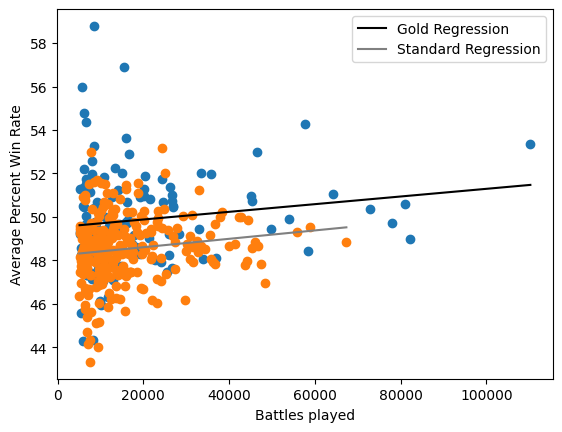

In [48]:
premiumGeneral = generalDf[generalDf['isPrem'] == True ]
stdGeneral = generalDf[generalDf['isPrem'] == False]

premiumGeneral = premiumGeneral[premiumGeneral['battles'] > 5000]
stdGeneral = stdGeneral[stdGeneral['battles'] > 5000]

reg = linear_model.LinearRegression()

x = np.array(premiumGeneral['battles']).reshape(-1,1)
y = premiumGeneral['winrate']

reg.fit(x,y)

predictions = reg.predict(x)
plt.scatter(x,y)
plt.plot(x, predictions, color='black', label='Gold Regression')

x = np.array(stdGeneral['battles']).reshape(-1,1)
y = stdGeneral['winrate']

reg.fit(x,y)

predictions = reg.predict(x)
plt.scatter(x,y)
plt.plot(x, predictions, color='gray', label='Standard Regression')

plt.xlabel('Battles played')
plt.ylabel('Average Percent Win Rate')
plt.legend()

plt.show()


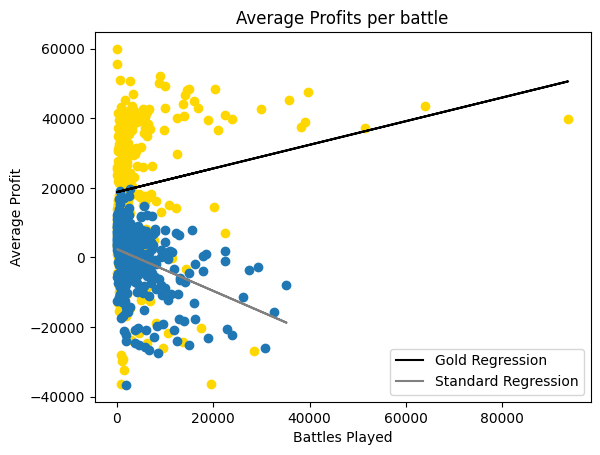

In [49]:
premiumEcon = economicDF[economicDF['isPrem'] == True]
stdEcon = economicDF[economicDF['isPrem'] == False]

reg = linear_model.LinearRegression()

x = np.array(premiumEcon['battles']).reshape(-1,1)
y = premiumEcon['avg_profit']

reg.fit(x,y)

predictions = reg.predict(x)
plt.scatter(x,y,color = 'gold')
plt.plot(x, predictions, color='black', label='Gold Regression')


x = np.array(stdEcon['battles']).reshape(-1,1)
y = stdEcon['avg_profit']

reg.fit(x,y)
predictions = reg.predict(x)
plt.scatter(x,y)
plt.plot(x, predictions, color='gray', label='Standard Regression')

plt.ylabel('Average Profit')
plt.xlabel('Battles Played')
plt.title('Average Profits per battle')
plt.legend()
plt.show()

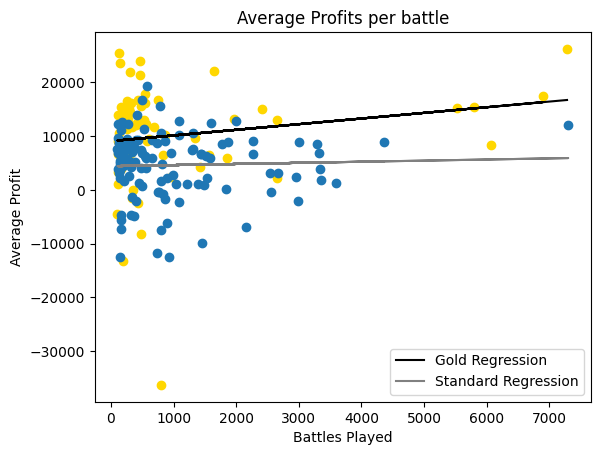

In [50]:
premiumEcon = economicDF[economicDF['isPrem'] == True]
stdEcon = economicDF[economicDF['isPrem'] == False]

stdEcon = stdEcon[stdEcon['tier'] < 6]
premiumEcon = premiumEcon[premiumEcon['tier'] < 6]

reg = linear_model.LinearRegression()

x = np.array(premiumEcon['battles']).reshape(-1,1)
y = premiumEcon['avg_profit']

reg.fit(x,y)

predictions = reg.predict(x)
plt.scatter(x,y,color = 'gold')
plt.plot(x, predictions, color='black', label='Gold Regression')


x = np.array(stdEcon['battles']).reshape(-1,1)
y = stdEcon['avg_profit']

reg.fit(x,y)
predictions = reg.predict(x)
plt.scatter(x,y)
plt.plot(x, predictions, color='gray', label='Standard Regression')

plt.ylabel('Average Profit')
plt.xlabel('Battles Played')
plt.title('Average Profits per battle')
plt.legend()
plt.show()

Null Hypothesis being a preiumn improves all apsects of playing, winrate, damnage, blocking damage, spotting for light tanks

Null Hypothese : Being a premium does not effect winrate
Alter : Being a premium does effect win rate
Condifence of 0.05

In [51]:
winModel = smf.ols('winrate ~ isPrem', data=generalDf).fit()
p_value = winModel.pvalues['isPrem[T.True]']

print('P Value: ' + str(p_value))

if p_value < 0.05:
    print('Null Hypothesis rejected')
    print('Correlation between being a premium and win rate')
else:
    print('Null Hypothese correct')

P Value: 0.0015195096682438104
Null Hypothesis rejected
Correlation between being a premium and win rate


In [52]:
damageModel = smf.ols('damage ~ isPrem', data=generalDf).fit()
p_value = damageModel.pvalues['isPrem[T.True]']
print('P Value: ' + str(p_value))

if p_value < 0.05:
    print('Null Hypothesis rejected')
    print('Correlation between being a premium and damage')
else:
    print('Null Hypothese correct')

P Value: 0.011721116870314678
Null Hypothesis rejected
Correlation between being a premium and damage


In [53]:
blockingModel = smf.ols('damage_blocked ~ isPrem', data=generalDf).fit()
p_value = blockingModel.pvalues['isPrem[T.True]']
print('P Value: ' + str(p_value))

if p_value < 0.05:
    print('Null Hypothesis rejected')
    print('Correlation between being a premium and blocking damage')
else:
    print('Null Hypothese correct')

P Value: 0.1112734426414096
Null Hypothese correct


In [54]:
lightDF = generalDf[generalDf['class'] == 'LT']

lightDF = smf.ols('spotting_assist ~ isPrem', data=generalDf).fit()

p_value = lightDF.pvalues['isPrem[T.True]']
print('P Value: ' + str(p_value))

if p_value < 0.05:
    print('Null Hypothesis rejected')
    print('Correlation between being a light premium and spotting')
else:
    print('Null Hypothese correct')

P Value: 0.1785965251235589
Null Hypothese correct


In [55]:

profitModel = smf.ols('avg_profit ~ isPrem', data = economicDF).fit()
p_value = profitModel.pvalues['isPrem[T.True]']
print('P Value: ' + str(p_value))

if p_value < 0.05:
    print('Null Hypothesis rejected')
    print('Correlation between being a light premium and average profit')
else:
    print('Null Hypothese correct')

P Value: 5.232335933507729e-59
Null Hypothesis rejected
Correlation between being a light premium and average profit


In [56]:
combind = pd.merge(generalDf, economicDF, on=['tank_id', 'name'], how='inner')

combind


damage_received  survival nation_x  player_winrate  winrate  isPrem_x  \
0               1085     27.44   France           51.46    53.36      True   
1                928     30.85  Germany           49.05    48.96      True   
2                782     23.45   France           50.28    50.58      True   
3                842     34.90     USSR           49.74    49.72      True   
4               1507     28.56   France           49.38    50.34      True   
..               ...       ...      ...             ...      ...       ...   
549              670     26.47  Germany           50.08    50.14      True   
550              520     26.24   France           51.34    49.34     False   
551             1158     25.00  Germany           49.97    46.85      True   
552              596     19.10      USA           53.77    53.07      True   
553             1251     29.85    Czech           58.50    59.85      True   

    class_x  tier_x  damage_blocked  battles_x  ...  cost_per_shot  \
0        MT       8               3     110271  ...           2964   
1        TD       8               5      82120  ...           2181   
2        LT       8               0      80964  ...           1884   
3        TD       8               1      77995  ...           2103   
4        MT       9             137      72969  ...           1849   
..      ...     ...             ...        ...  ...            ...   
549      MT       5              54        204  ...           1460   
550      MT       5             118        202  ...           2466   
551      MT       8             146        148  ...           2510   
552      MT       5             267         89  ...           2226   
553      HT       7             623         67  ...           1613   

     avg_profit  avg_ammo_cost  tier_y  nation_y class_y  isPrem_y  \
0         39905          25611       8    France      MT      True   
1         42594          16516       8   Germany      TD      True   
2         37536          10772       8    France      LT      True   
3         45312          16120       8      USSR      TD      True   
4          7028          16691       9    France      MT      True   
..          ...            ...     ...       ...     ...       ...   
549       -1586          22337       5   Germany      MT      True   
550       -7349          28543       5    France      MT     False   
551       26060          25215       8   Germany      MT      True   
552      -13157          56026       5       USA      MT      True   
553       55578          25856       7     Czech      HT      True   

     avg_earnings  avg_repair_cost  battles_y  
0           84641             6487      93646  
1           71758             5966      29956  
2           65811             4724      38142  
3           74162             5616      35758  
4           46361            15519      22496  
..            ...              ...        ...  
549         38573             1881        330  
550         37221             2094        166  
551         64859             7002        142  
552         64473             1592        184  
553         88126             6025        112  

[554 rows x 28 columns]

In [57]:
trainingData = pd.DataFrame()
trainingData['tier'] = combind['tier_x']
trainingData['isPrem'] = combind['isPrem_x'].astype(int)
trainingData['class'] = combind['class_x'].replace({'LT' : 0, 'MT' : 1, 'HT' : 2, 'TD' : 3, 'SPG' : 4})
trainingData['cost_per_shot'] = combind['cost_per_shot']
trainingData['avg_ammo_cost'] = combind['avg_ammo_cost']
trainingData['avg_repair_cost'] = combind['avg_repair_cost']
trainingData['survival'] = combind['survival']
trainingData['avg_profit'] = combind['avg_profit']

trainingData.sort_values('avg_profit')


tier  isPrem  class  cost_per_shot  avg_ammo_cost  avg_repair_cost  \
313    10       0      3           3648          43389            18242   
274    10       1      2           4543          57214            25952   
345    10       1      2           3681          48503            23100   
448    10       1      2           3895          48374            26656   
483    10       1      1           4496          59464            20977   
..    ...     ...    ...            ...            ...              ...   
393     8       1      2           2047          19510             6590   
535     8       1      2           3536          32916             6941   
277     8       1      0            770           8386             4909   
553     7       1      2           1613          25856             6025   
529     8       1      3           1618          14155             4987   

     survival  avg_profit  
313     28.95      -36604  
274     38.86      -36446  
345     23.36      -32234  
448     21.62      -29768  
483     32.91      -29069  
..        ...         ...  
393     28.11       50730  
535     31.79       50884  
277     17.73       52118  
553     29.85       55578  
529     30.61       59913  

[554 rows x 8 columns]

In [58]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    for i in range(num_iterations):
        # Calculate the predicted values
        h = np.dot(X, theta)

        # Update the parameters
        theta -= alpha * (1/m) * np.dot(X.T, (h - y))

    return theta

In [59]:
# Extract features (X) and target (y) variables from the DataFrame
y = trainingData["avg_profit"]
X = trainingData.drop("avg_profit", axis=1)

In [60]:
# Normalize the features
X_norm = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X_norm = np.hstack((np.ones((X_norm.shape[0], 1)), X_norm))


In [86]:
alpha = 0.01
num_iterations = 50000
theta = np.zeros(X_norm.shape[1])


In [87]:
theta = gradient_descent(X_norm, y, theta, alpha, num_iterations)
print("Learned Parameters (Theta):", theta)


Learned Parameters (Theta): [  8616.55234657  13518.74005636   9582.11088016   1072.08565187
   -252.4843579   -4483.44865847 -17991.65392402  -1367.30134992]


In [88]:
def predict_profit(tier, is_premium, class_type, cost_per_shot, avg_ammo_cost, avg_repair_cost, survival, theta):
    # Normalize the input features
    tier_norm = (tier - np.mean(trainingData["tier"])) / np.std(trainingData["tier"])
    is_premium_norm = (is_premium - np.mean(trainingData["isPrem"])) / np.std(trainingData["isPrem"])
    class_norm = (class_type - np.mean(trainingData["class"])) / np.std(trainingData["class"])
    cost_per_shot_norm = (cost_per_shot - np.mean(trainingData["cost_per_shot"])) / np.std(trainingData["cost_per_shot"])
    avg_ammo_cost_norm = (avg_ammo_cost - np.mean(trainingData["avg_ammo_cost"])) / np.std(trainingData["avg_ammo_cost"])
    avg_repair_cost_norm = (avg_repair_cost - np.mean(trainingData["avg_repair_cost"])) / np.std(trainingData["avg_repair_cost"])
    survival_norm = (survival - np.mean(trainingData["survival"])) / np.std(trainingData["survival"])

    # Add a bias term
    features = np.array([1, tier_norm, is_premium_norm, class_norm, cost_per_shot_norm, avg_ammo_cost_norm, avg_repair_cost_norm, survival_norm])

    # Calculate the predicted profit
    profit = np.dot(features, theta)

    return profit

In [100]:
prem = {True : 1, False : 0}
type = {'LT' : 0, 'MT' : 1, 'HT' : 2, 'TD' : 3, 'SPG' : 4}

tier = 8
is_premium = prem[True]
class_type = type['HT']
survival = 22
cost_per_shot = 2000
avg_ammo_cost = 20000
avg_repair_cost = 8000


profit = predict_profit(tier, is_premium, class_type, cost_per_shot, avg_ammo_cost, avg_repair_cost, survival, theta)
print("Predicted profit:", profit)

Predicted profit: 28213.767873302815
